# K-Nearest Neighbors

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.plot_functions import *
from src.knn_algorithm import KNN
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

### Selecting dataset **Iris Flower Dataset:**
**Iris Dataset Features:**
* **Number of instances (samples):** 150
* **Number of features:** 4 (sepal length and width, petal length and width)
* **Number of classes (labels):** 3 (Setosa, Versicolor and Virginica)
* **Class distribution:** Balanced (each class has 50 instances)

In [17]:
iris = load_iris()

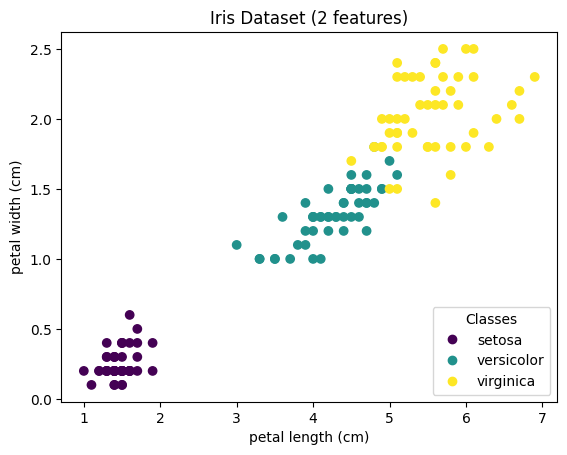

In [18]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3], title='Iris Dataset (2 features)')
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [19]:
X, y = iris.data, iris.target

In [20]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df["species"] = y

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


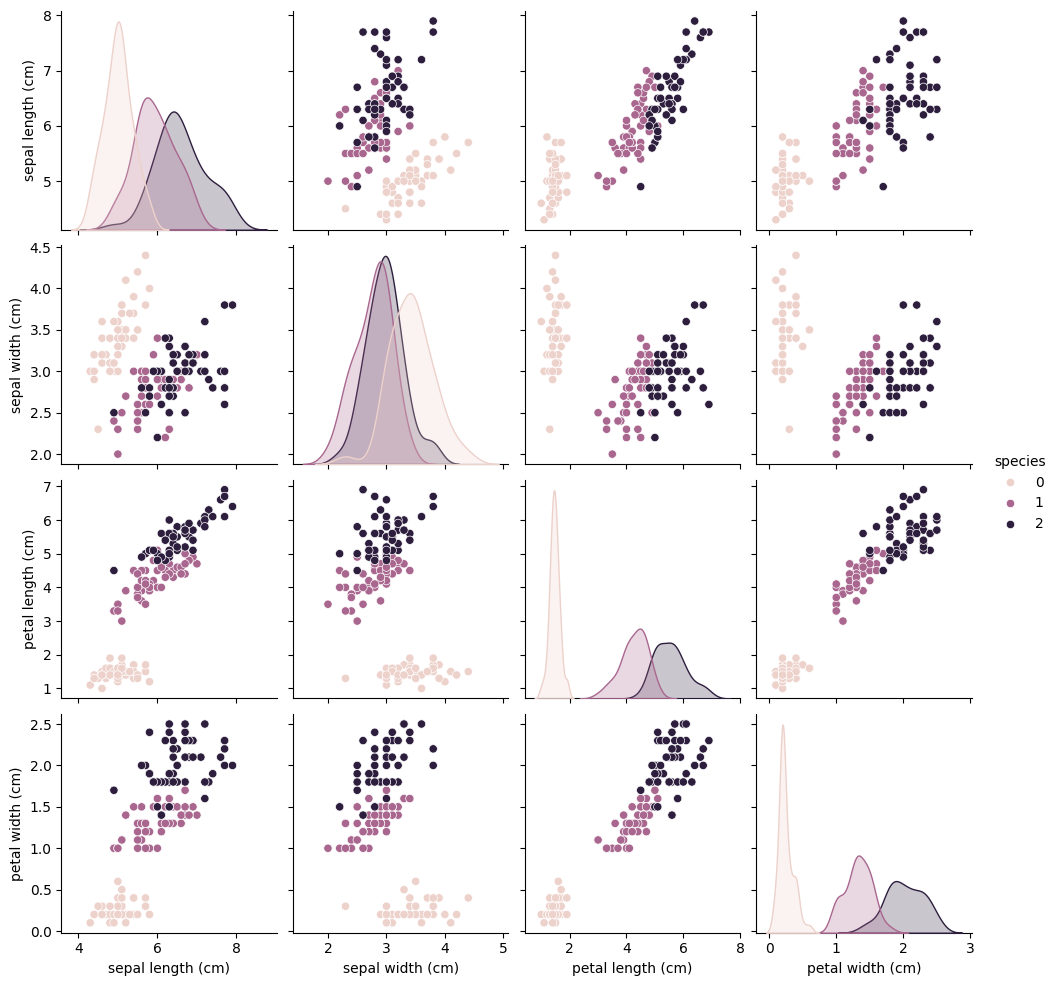

In [21]:
sns.pairplot(iris_df, hue="species")
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
model = KNN(k=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

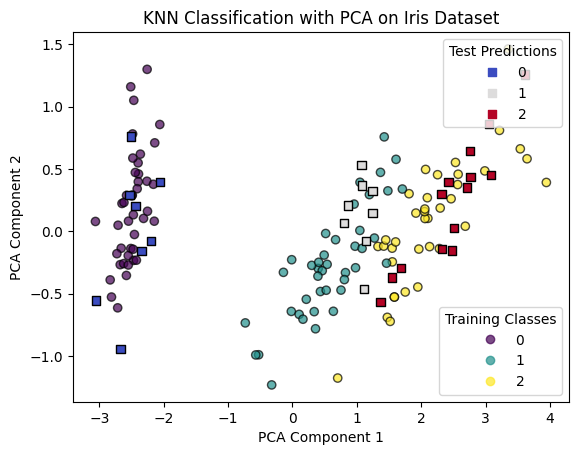

In [24]:
plot_knn_pca(X_train, y_train, X_test, y_pred, "Iris Dataset")

In [25]:
print(classification_report(y_test, y_pred))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred), 2))
print("F1 score: ", round(f1_score(y_test, y_pred, average='macro'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.89      0.94         9
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy score:  0.97
F1 score:  0.97


### Confusion Matrix

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

[Confusion matrix using Iris dataset example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

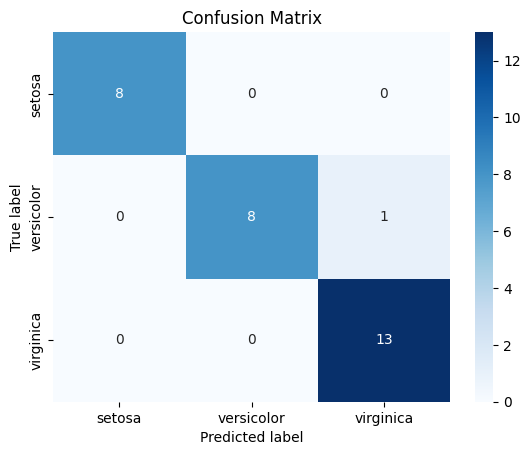

In [26]:
plot_confusion_matrix(y_test, y_pred, labels=np.unique(iris.target_names))

## Scaled Iris dataset

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
model.fit(X_train_scaled, y_train)

y_pred_scaled = model.predict(X_test_scaled)

In [29]:
print(classification_report(y_test, y_pred_scaled))
print("Accuracy score: ", round(accuracy_score(y_test, y_pred_scaled), 2))
print("F1 score: ", round(f1_score(y_test, y_pred_scaled, average='macro'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.89      0.94         9
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy score:  0.97
F1 score:  0.97


## Elbow method